In [1]:
#RQ1: loss analisys results!

"""
plot change mean and std from base for following metrics:
SF, 

for each of them also indicate the value at witch the base is and mayhaps percentual decrease!!!!!
- SHOW RELATIVE METRIC AND PERCENTUAL CHANGE FROM OG!!!!!!
- ALSO NOTE MEAN VAL FOR EACH FOR BASE
- ACC, pre, f1, rec, erd, aeod, aaod, aspd,  di, sf
-
""" 

'\nplot change mean and std from base for following metrics:\nSF, \n\nfor each of them also indicate the value at witch the base is and mayhaps percentual decrease!!!!!\n- SHOW RELATIVE METRIC AND PERCENTUAL CHANGE FROM OG!!!!!!\n- ALSO NOTE MEAN VAL FOR EACH FOR BASE\n- ACC, pre, f1, rec, erd, aeod, aaod, aspd,  di, sf\n-\n'

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

from experiment_utils import *
from src import *



pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


In [3]:
def metric_has_substring(metric, substrings):
    for sub in substrings:
        if sub in metric:
            return True
    return False

In [4]:
results_filename = "MAIN_3_models_race_sex"
results_filename = "MAIN_all_sex"

results_file = os.path.join("results",results_filename +".csv")
reader = ResultsReader(results_file)
#eader.change_other_to_comment()

all_metrics = reader.metrics
metrics_to_use = ["SF", "pres"]
metrics_to_display = [m for m in all_metrics if metric_has_substring(m, metrics_to_use)]# +[OtherColReader.ACC_SF_TO]

for col in ResultsReader.FILTERABLE:
    print(reader.get_all_column_values(col))
    
print(reader.columns_shown)


File 'results\MAIN_all_sex.csv' successfully loaded as DataFrame.
['German Dataset', 'Compas Dataset', 'Adult Dataset']
['']
["['sex']"]
['FYP VAE', 'LFR', 'Reweighing Bias Mitigation', 'FairBalance Bias Mitigation', 'FairMask Bias Mitigation', 'No Bias Mitigation']
['{\'c\': \'FYP\', \'my model config\': "VAEMaskConfig(epochs=1500, latent_dim=20, mask_values=None vae_layers=(75, 60, 30, 20), lr=0.006, \\nlosses_used=[\'Sensitive KL loss\', \'Pos Y vec loss\', \'Reconstruction loss\', \'KL divergence loss\'])Sensitive KL loss: {\'weight\': 9000, \'sens_col_ids\': [23]}, Pos Y vec loss: {\'weight\': 1200000}, Reconstruction loss: {\'weight\': 15}, KL divergence loss: {\'weight\': 0.05}, Latent sens ADV loss: {\'weight\': 0.1, \'lr\': 0.05, \'optimizer\': \'Adam\', \'layers\': (75, 30, 10), \'input_dim\': 19}, Flipped ADV loss: {\'weight\': 0.01, \'lr\': 0.05, \'optimizer\': \'Adam\', \'layers\': (75, 30, 10), \'input_dim\': 26, \'sens_col_ids\': [23]}"}', '{\'c\': \'FYP\', \'my model co

In [6]:
df = reader.get_mean_relative_metrics(use_percent=True)
df[reader.ML] = ''
mean_df = df.groupby(reader.filterable).mean().reset_index()
df.to_csv('output.csv', index=False)


____________________________________________________________________________________________________
German Dataset , ['LogisticRegression', 'nn keras', 'ElasticNet', 'DecisionTreeRegressor', 'RandomForestClassifier', 'NaiveBayes', 'SupportVectorClassifier'] ['sex']


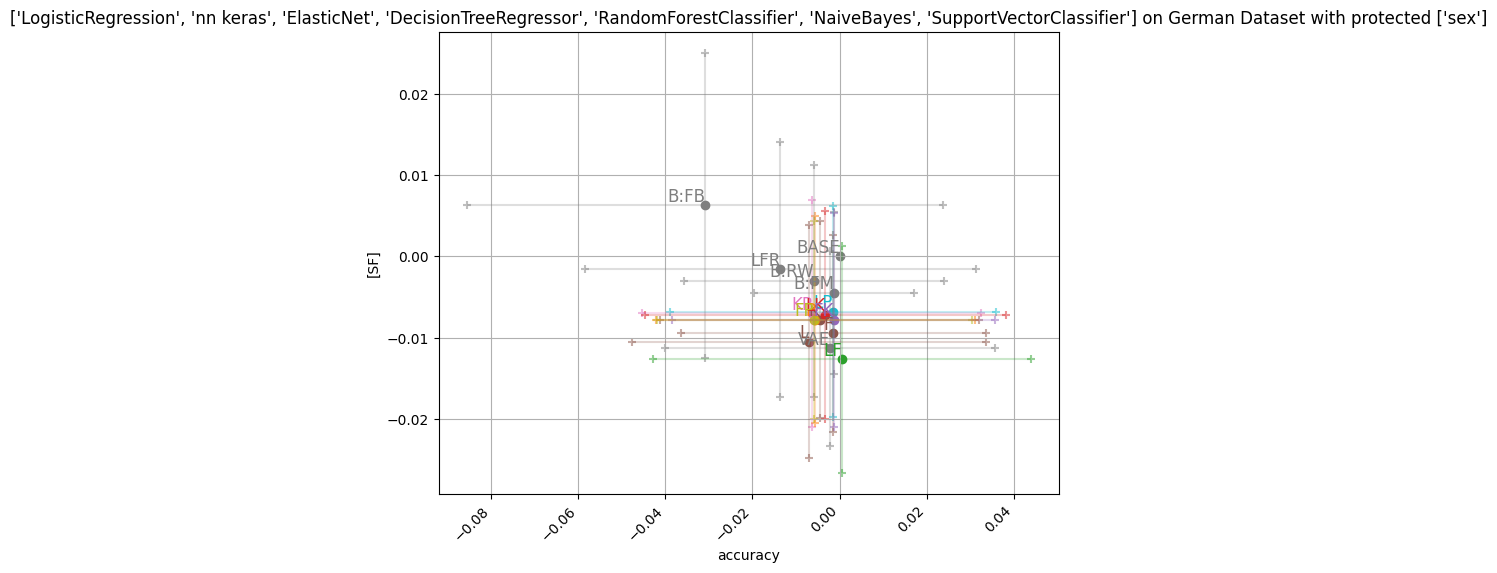

____________________________________________________________________________________________________
Compas Dataset , ['LogisticRegression', 'nn keras', 'ElasticNet', 'DecisionTreeRegressor', 'RandomForestClassifier', 'NaiveBayes', 'SupportVectorClassifier'] ['sex']


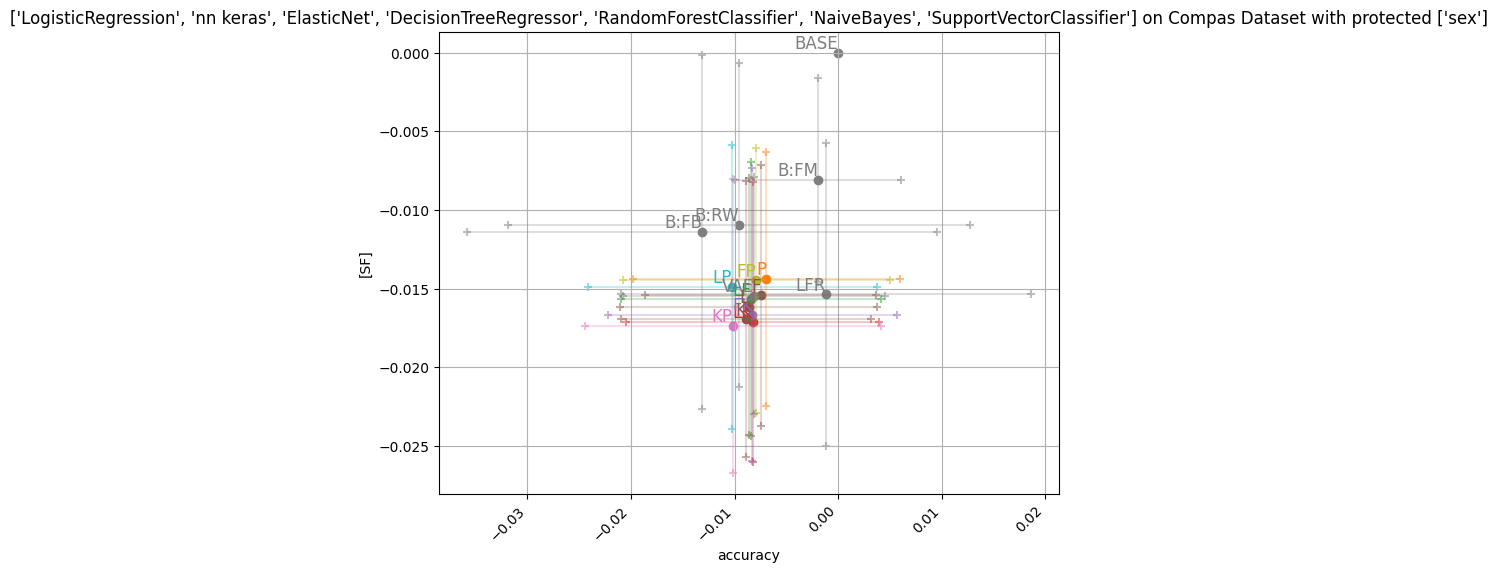

____________________________________________________________________________________________________
Adult Dataset , ['LogisticRegression', 'nn keras', 'ElasticNet', 'DecisionTreeRegressor', 'RandomForestClassifier', 'NaiveBayes', 'SupportVectorClassifier'] ['sex']


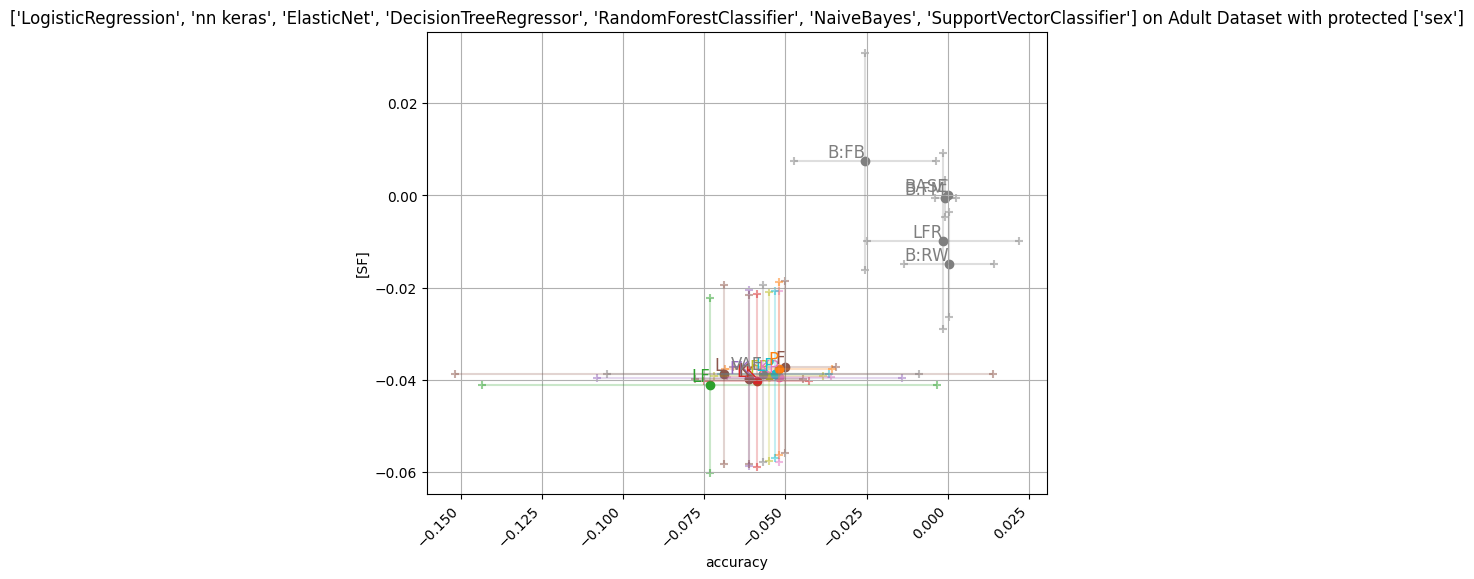

In [ ]:
boo = True

if boo:

    def f(df):
        loss_a =  (df["other"].str.contains("Latent sens ADV loss"))  # (df["other"].str.contains("Sensitive KL loss")) 
        loss = loss_a | (df["other"].str.contains("Sensitive KL loss")) 
        general_mask = (df["data"].str.contains('German')) & (df["ML method"].str.contains('MLP'))
        performance_mask =  loss & (df["accuracy"]> -0.01 ) &(df["[SF] Statistical Parity Subgroup Fairness"]< -0.013 ) 
        #return df#[general_mask & ( performance_mask  | ~(df["other"].str.contains('FYP')) )]
        return df#[~(df["other"].str.contains('LFR'))]
    reader.relative_metrics_filter = f

    grapher = ResultsGrapher(reader)
    grapher.show_legend = False
    #grapher.plot_metrics_vs_metric(mean=True, relative=False, metrics = metrics_to_display, metric = Metrics.MEAN_Y, style=grapher.STYLE_2D_STD)
    #grapher.plot_metrics_vs_metric(mean=False, relative=True, metrics = metrics_to_display, metric = OtherColReader.LOSSES, mean_all_same_loss=True)
    grapher.plot_metrics_vs_metric(mean=False, relative=True, metrics = metrics_to_display, style=grapher.STYLE_2D_STD)

    reader.clear_filters()


    relative= reader.get_relative_metrics()

    for r in relative['other']:
        #print(r)
        pass
        
    #relative


In [ ]:

metrics_to_use = ["SF", "accu", "f1", "AOD", "EOD", "DI"]
metrics_to_display = all_metrics #[m for m in all_metrics if metric_has_substring(m, metrics_to_use)]# +[OtherColReader.ACC_SF_TO]

____________________________________________________________________________________________________
German Dataset , ['LogisticRegression', 'nn keras', 'ElasticNet', 'DecisionTreeRegressor', 'RandomForestClassifier', 'NaiveBayes', 'SupportVectorClassifier'] ['sex']


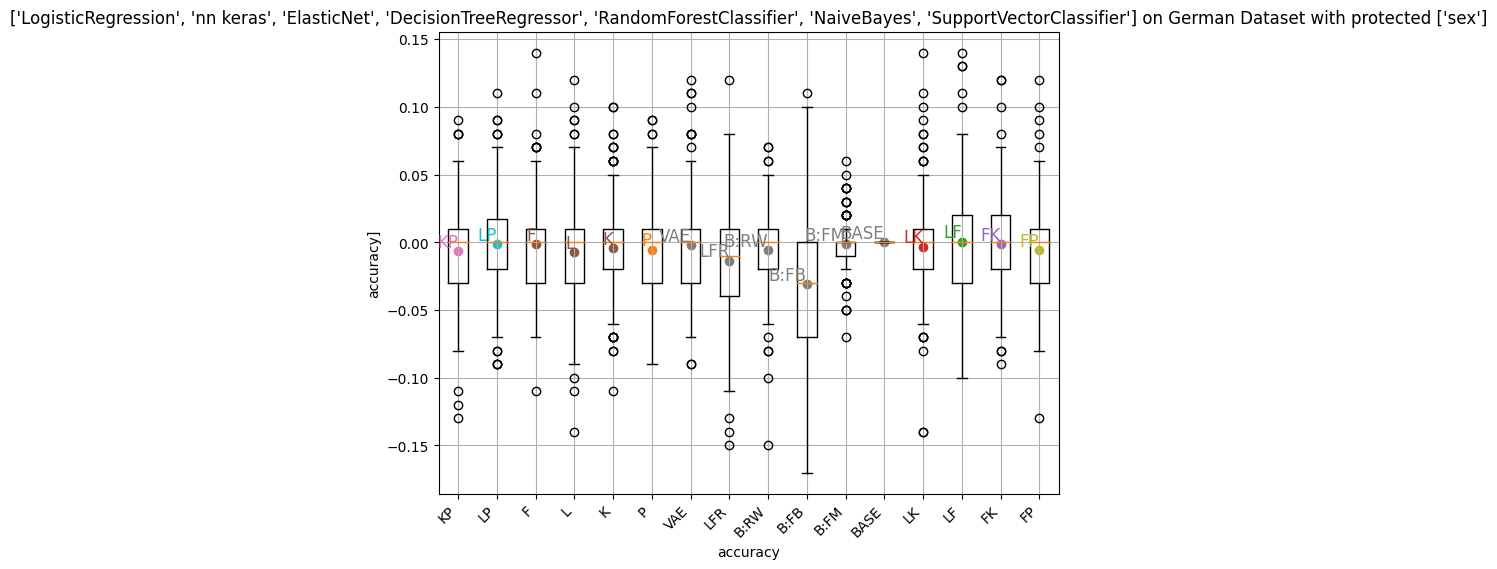

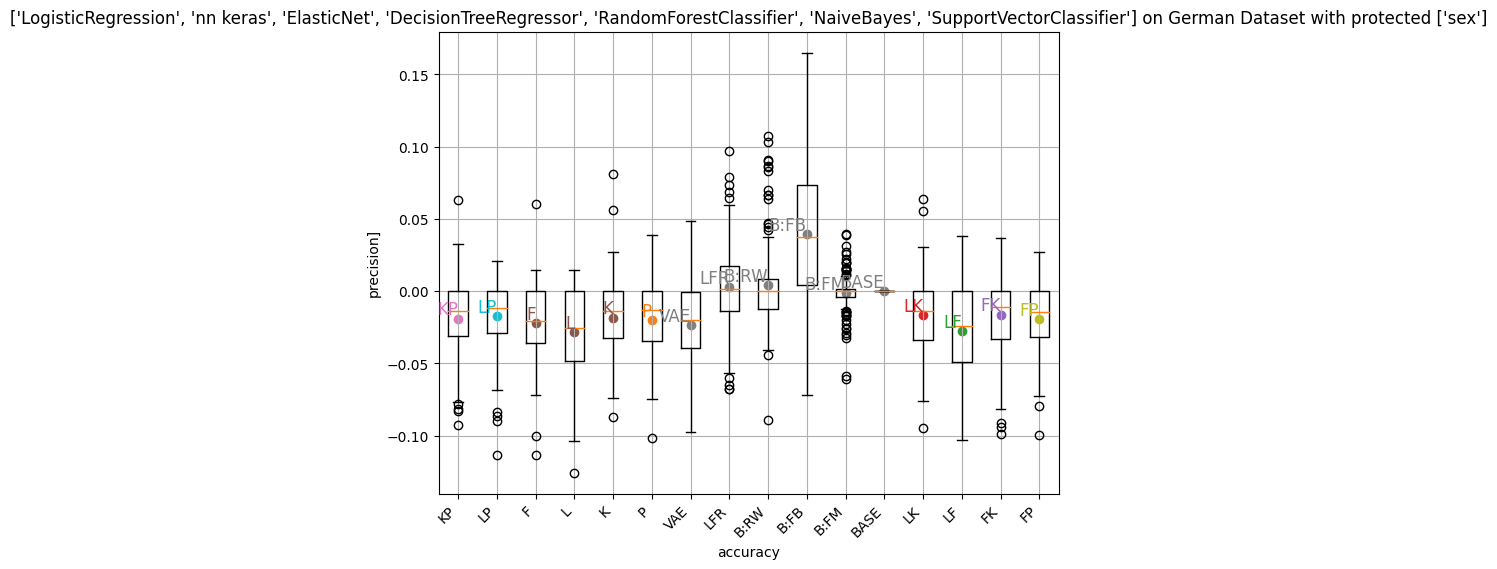

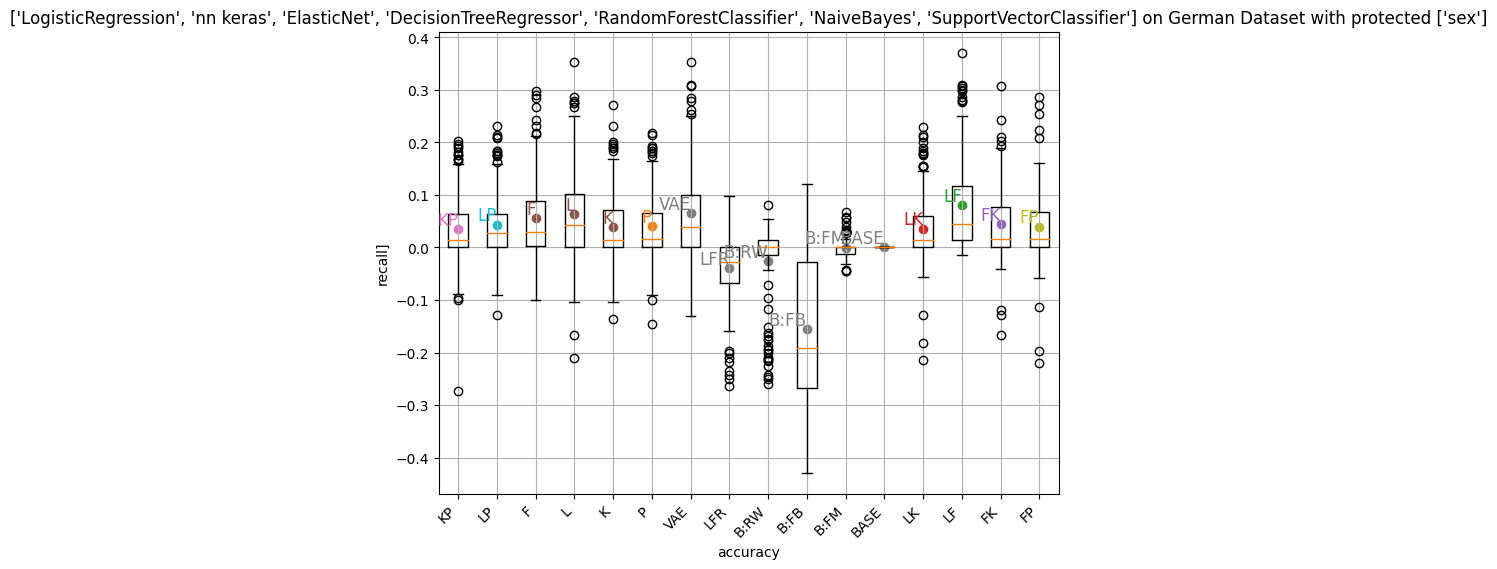

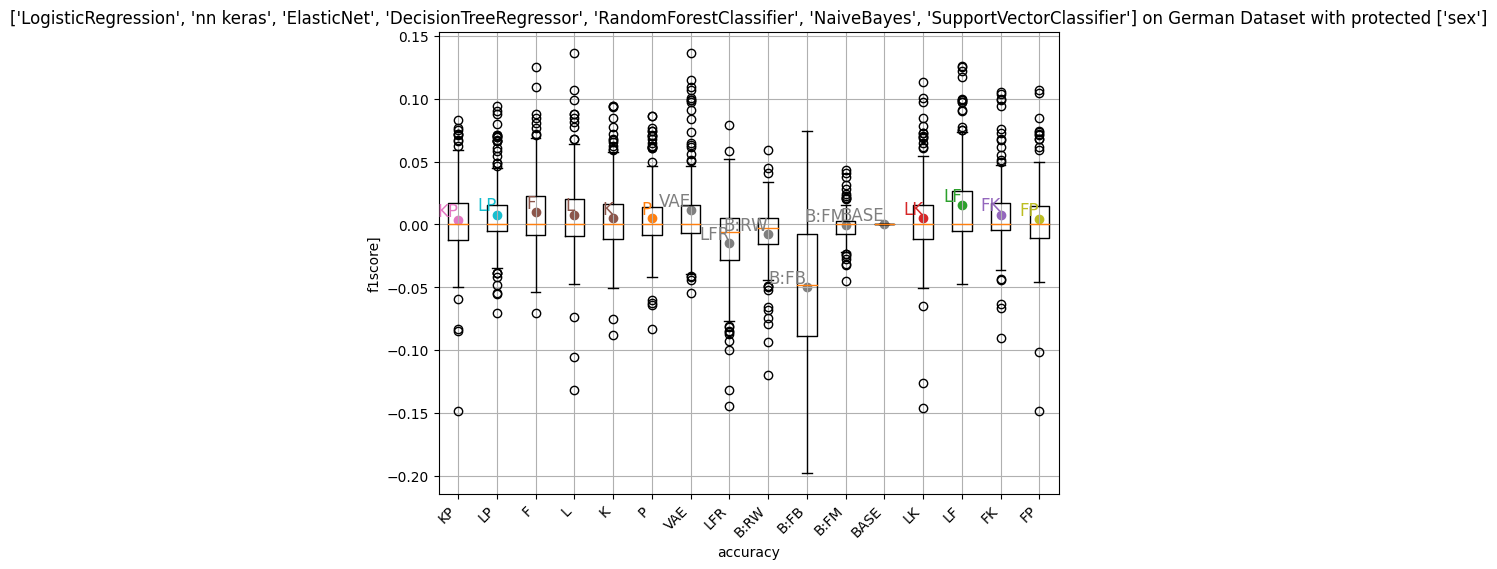

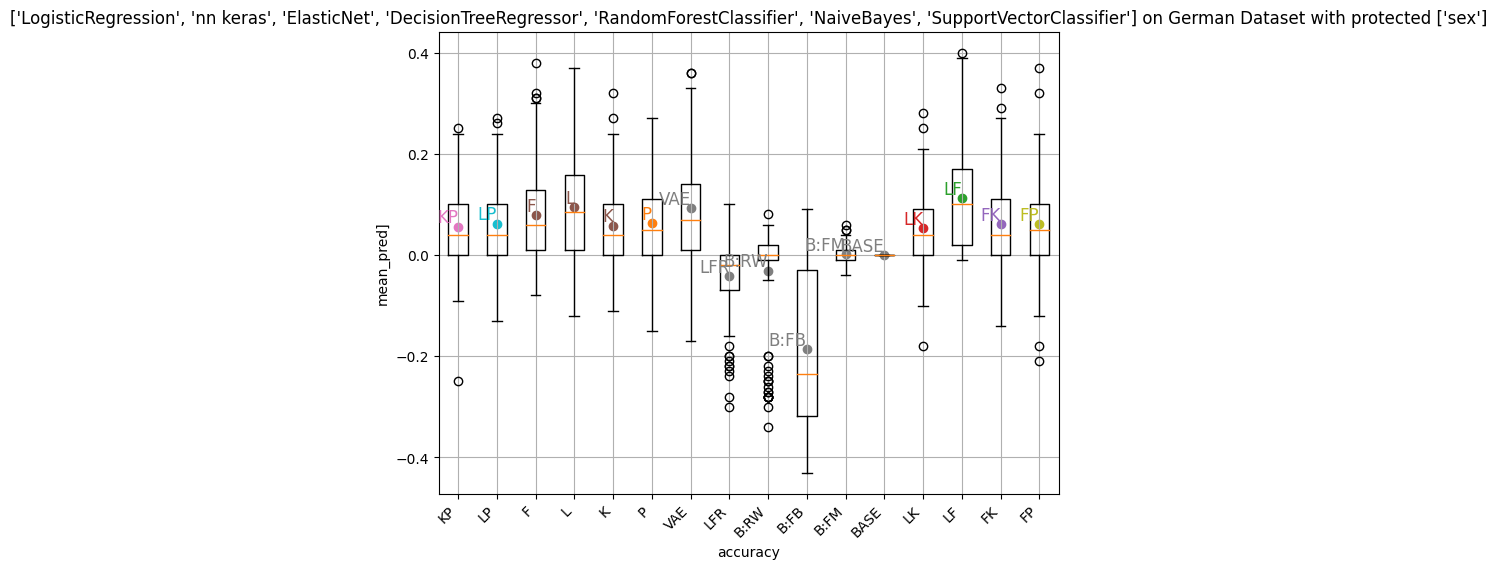

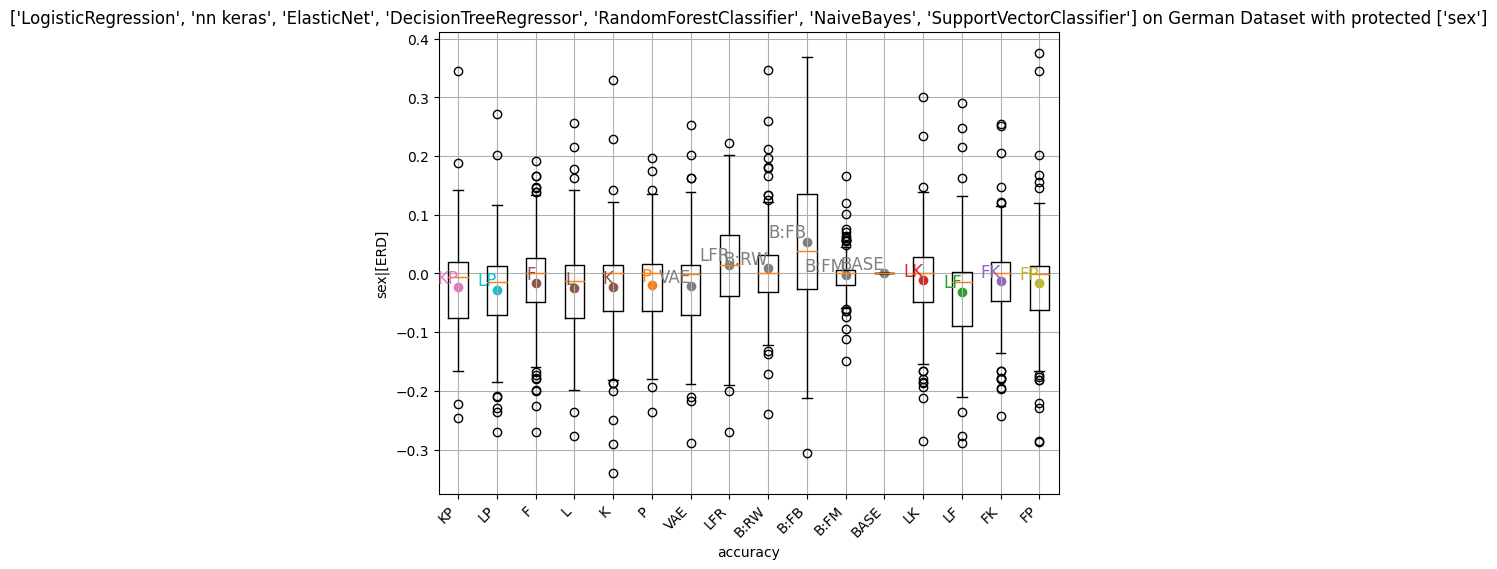

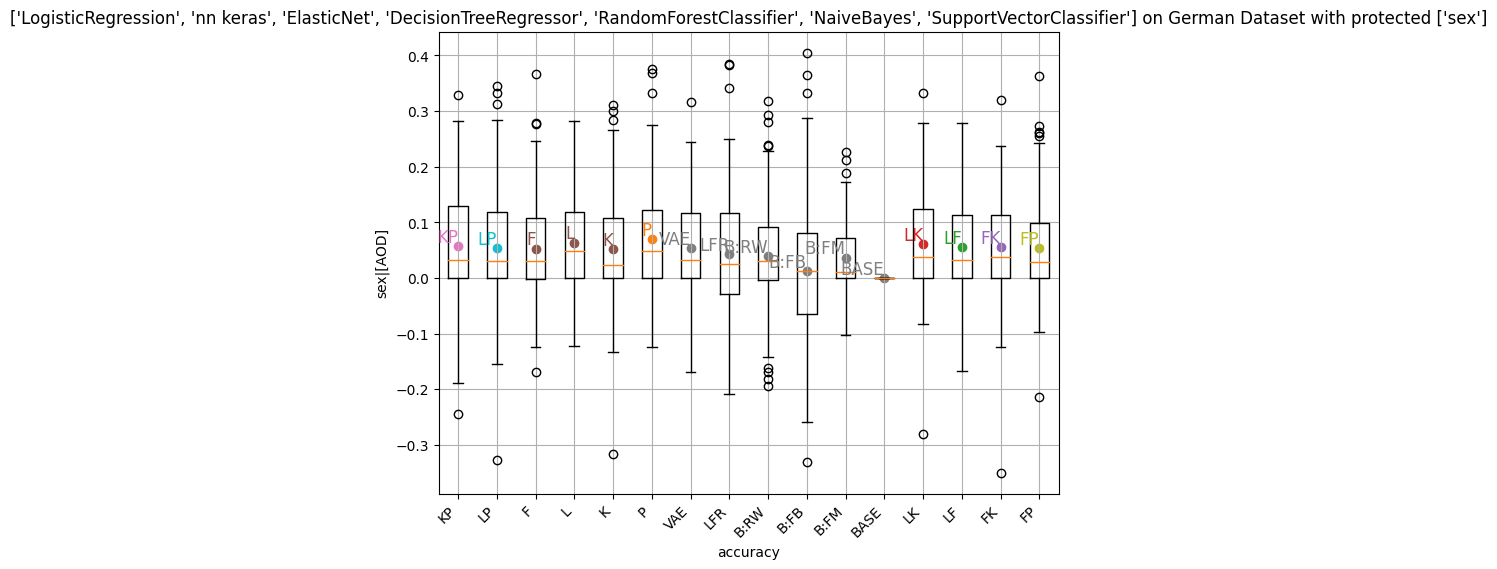

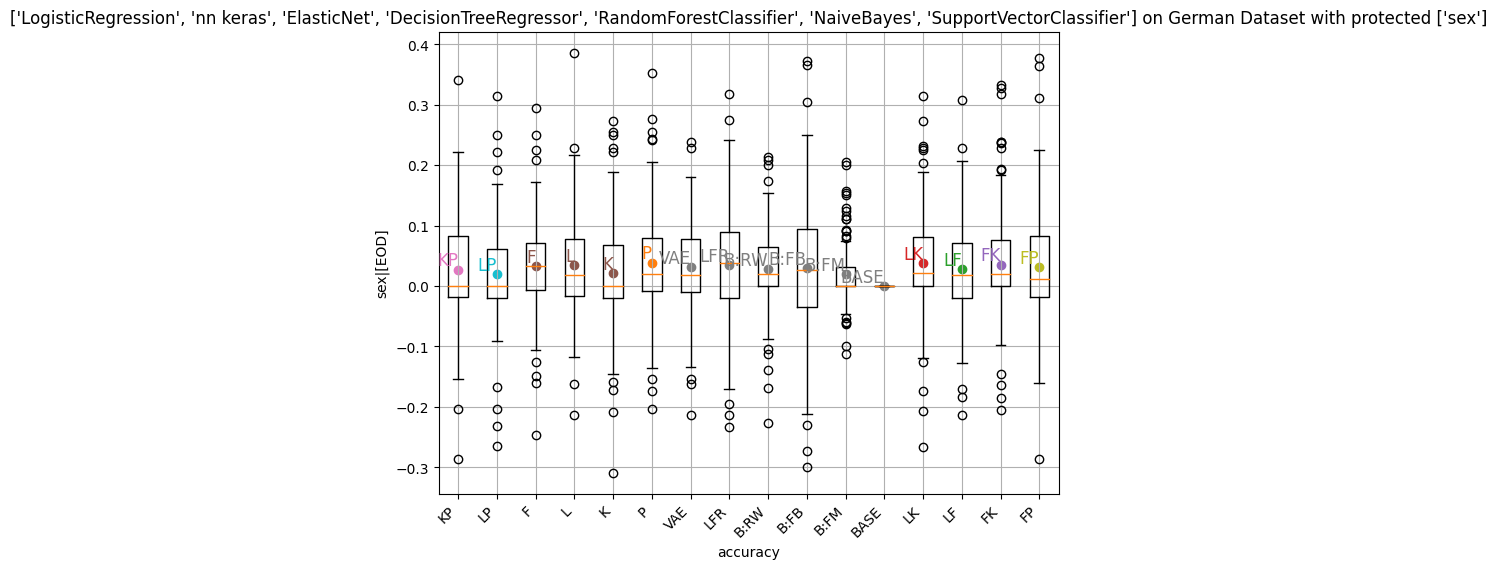

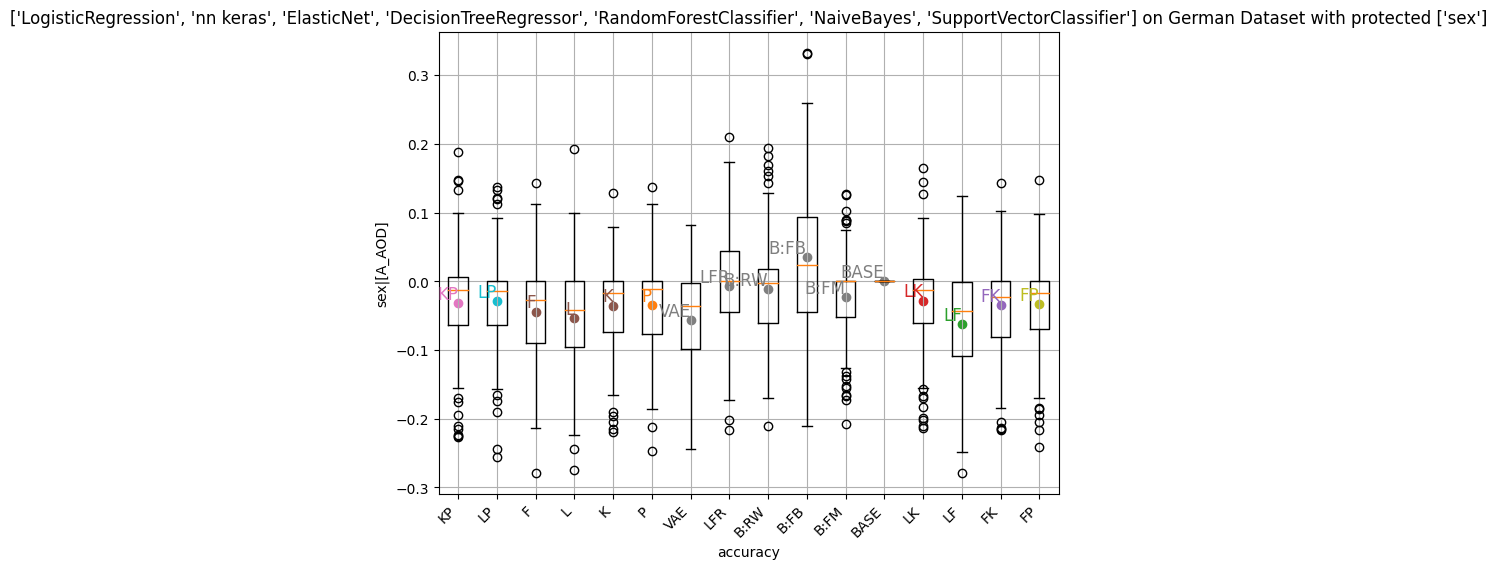

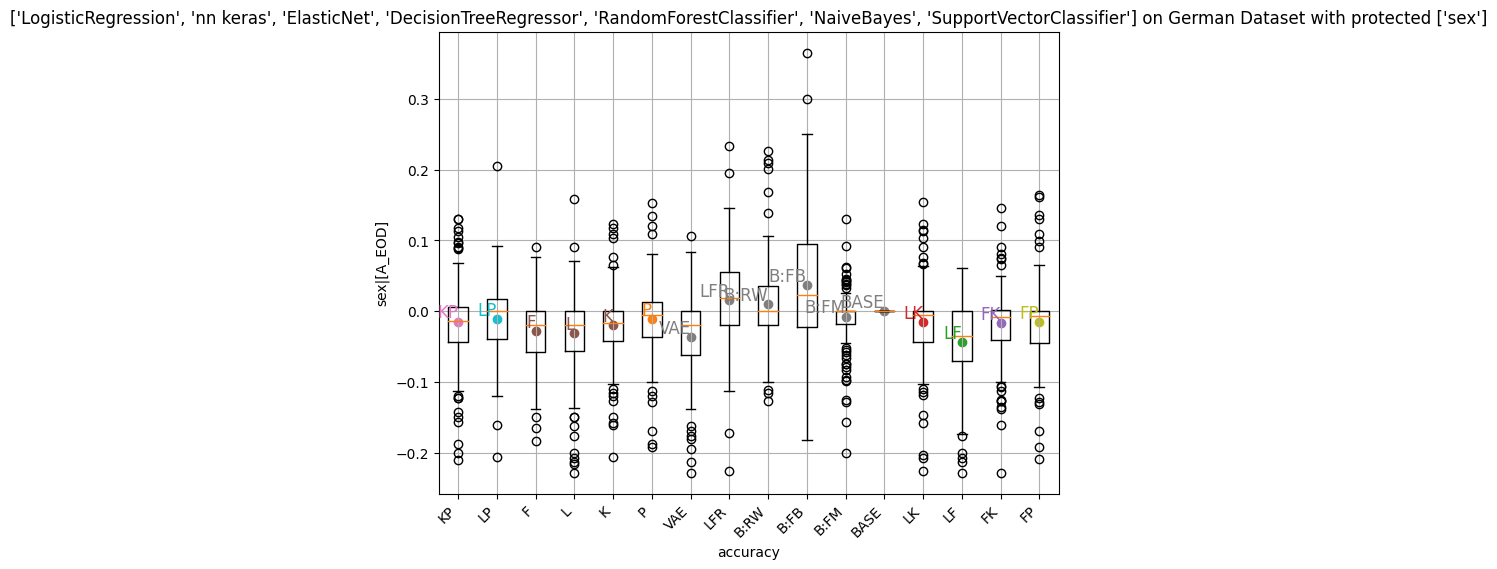

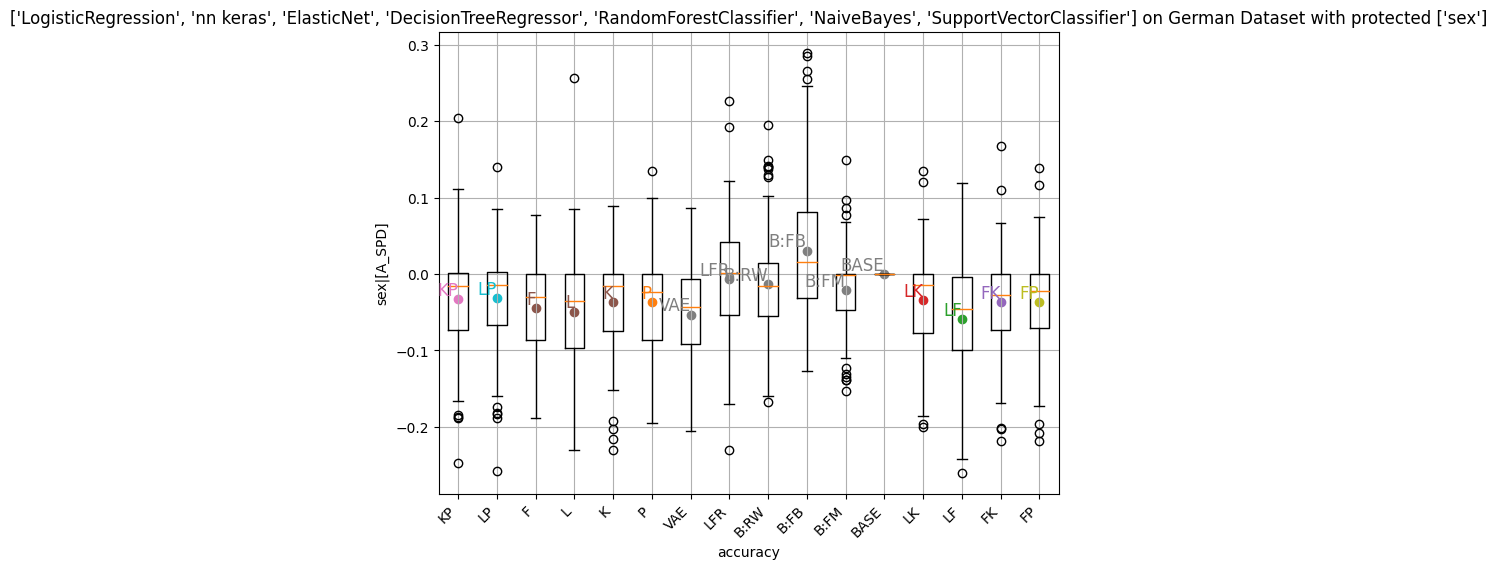

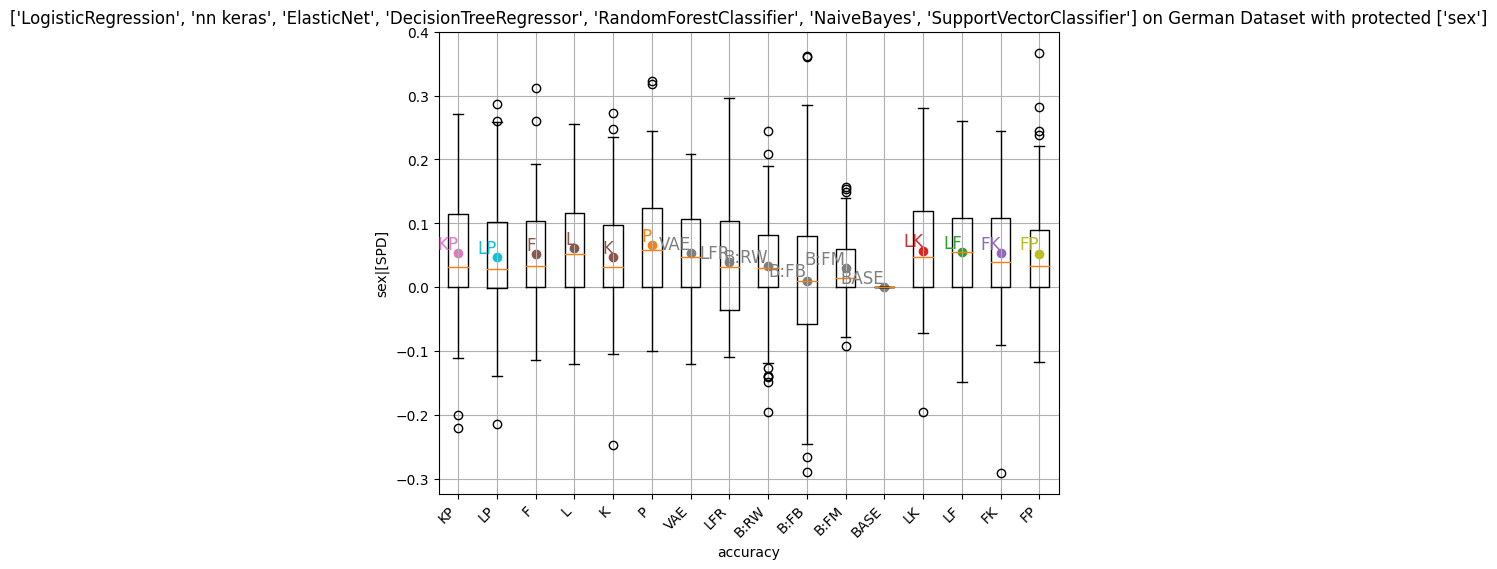

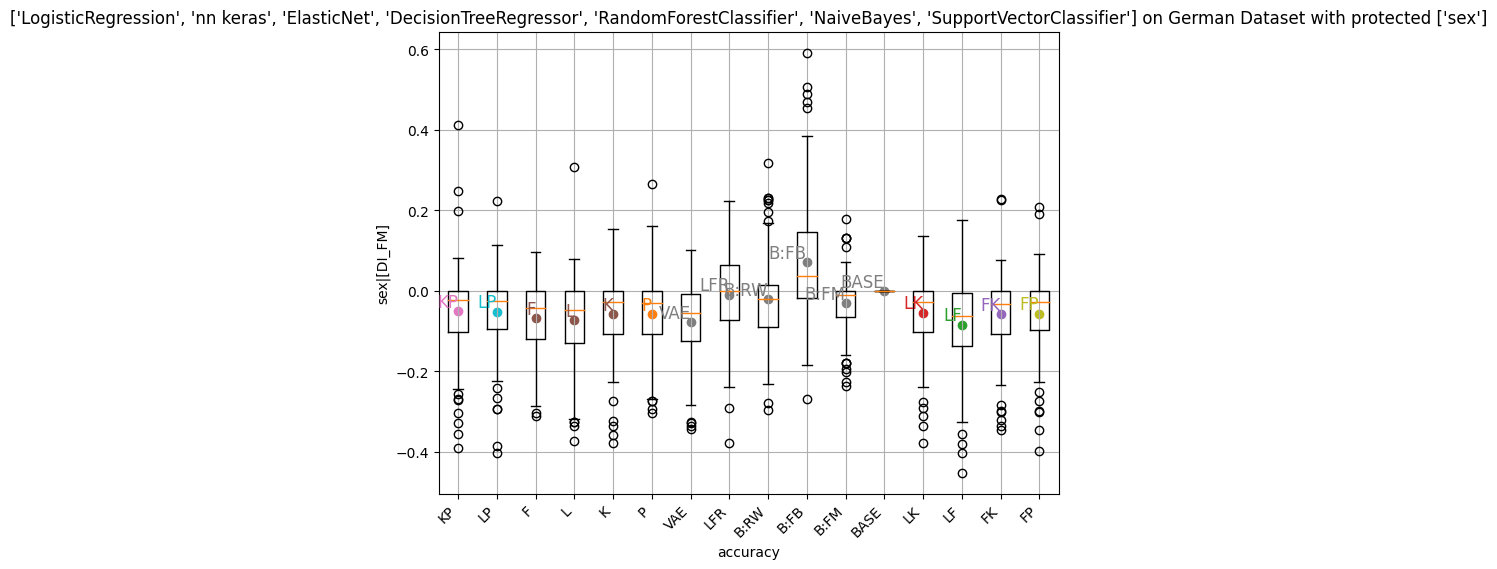

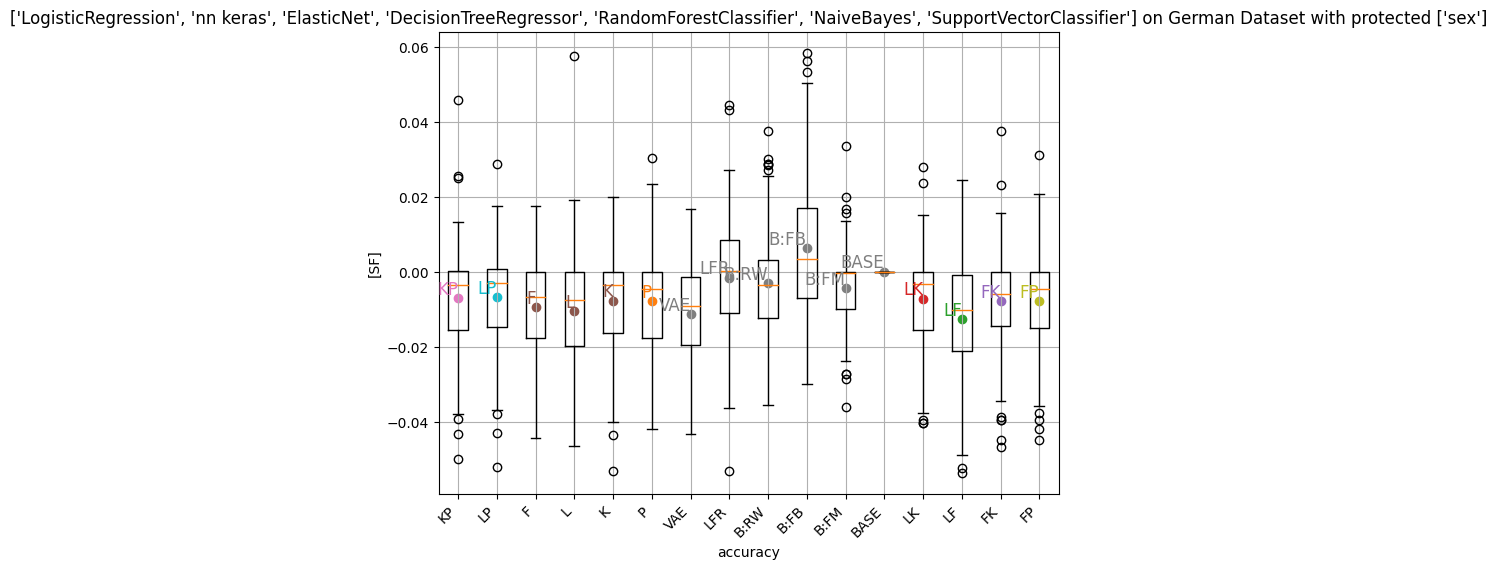

____________________________________________________________________________________________________
Compas Dataset , ['LogisticRegression', 'nn keras', 'ElasticNet', 'DecisionTreeRegressor', 'RandomForestClassifier', 'NaiveBayes', 'SupportVectorClassifier'] ['sex']


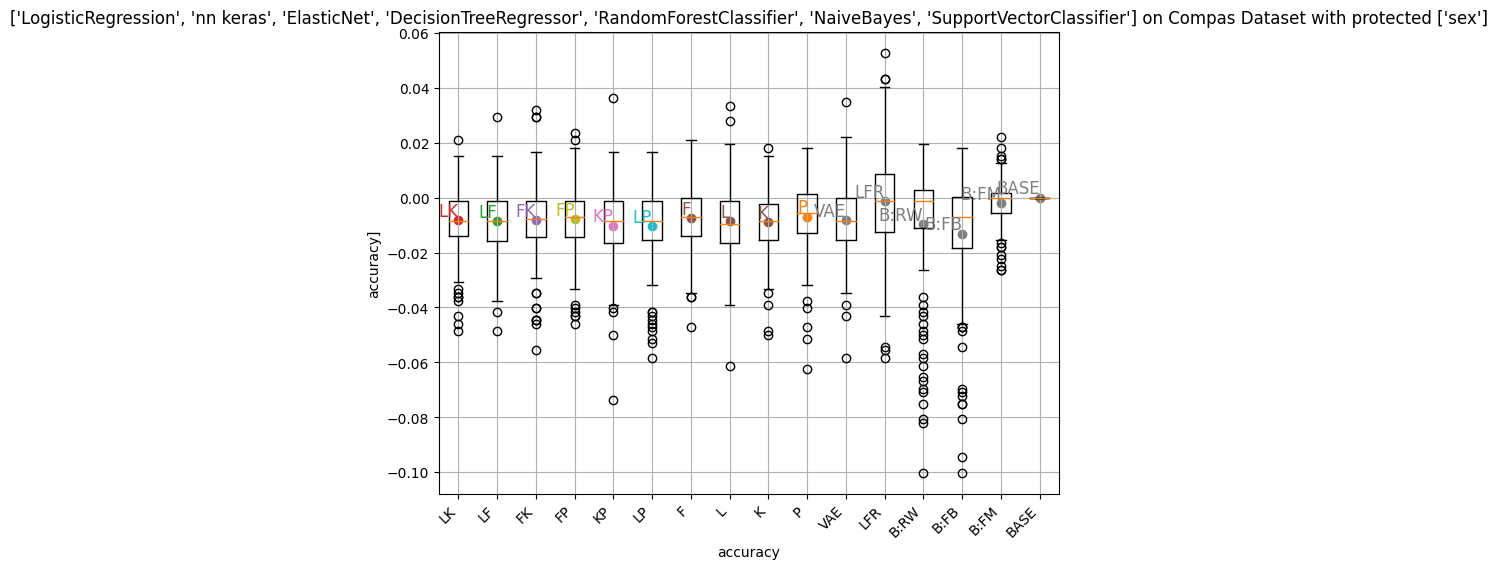

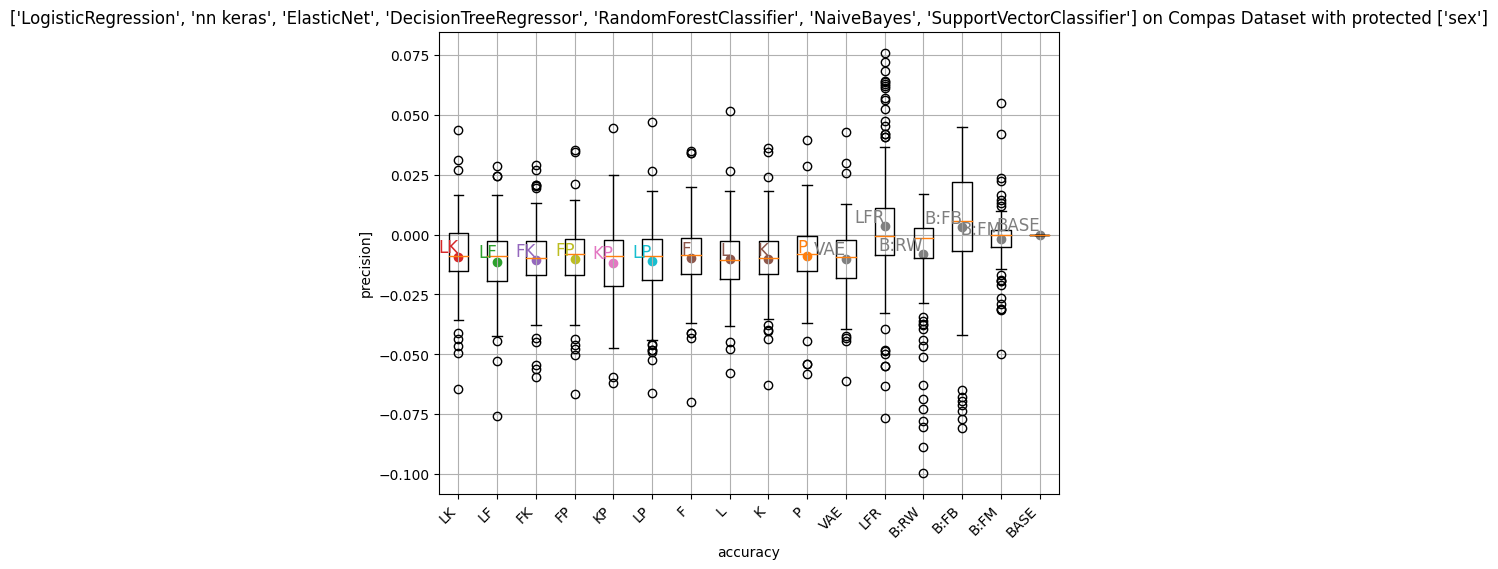

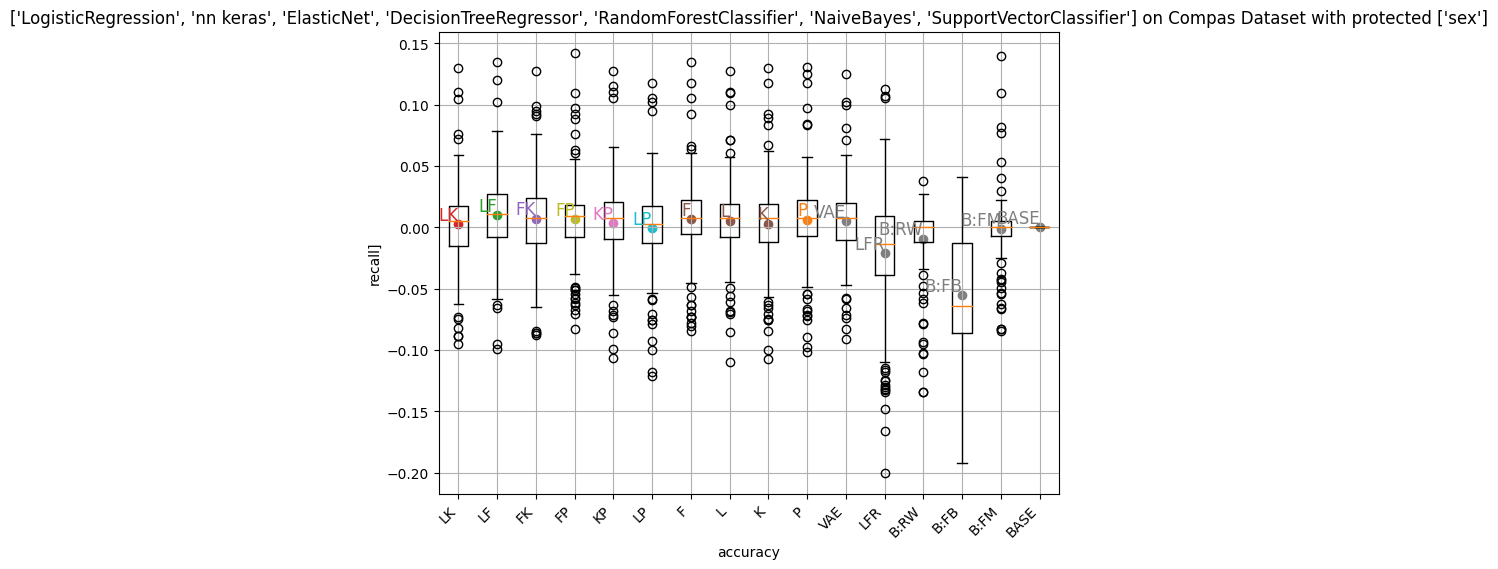

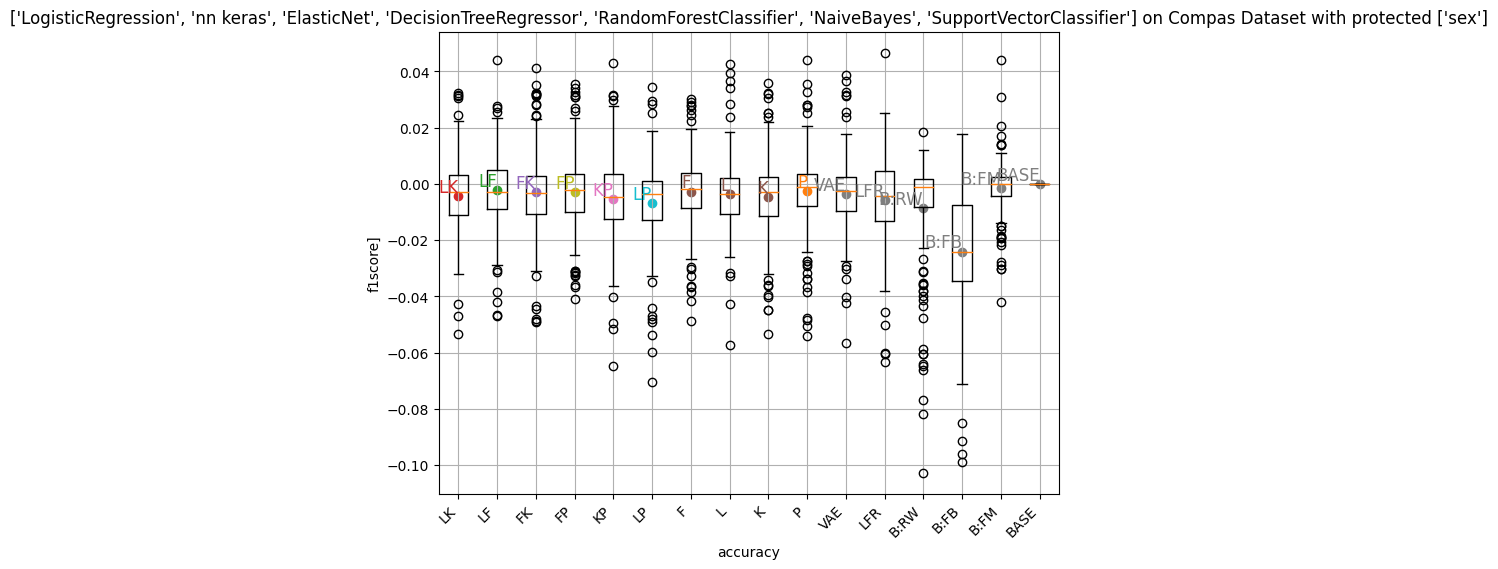

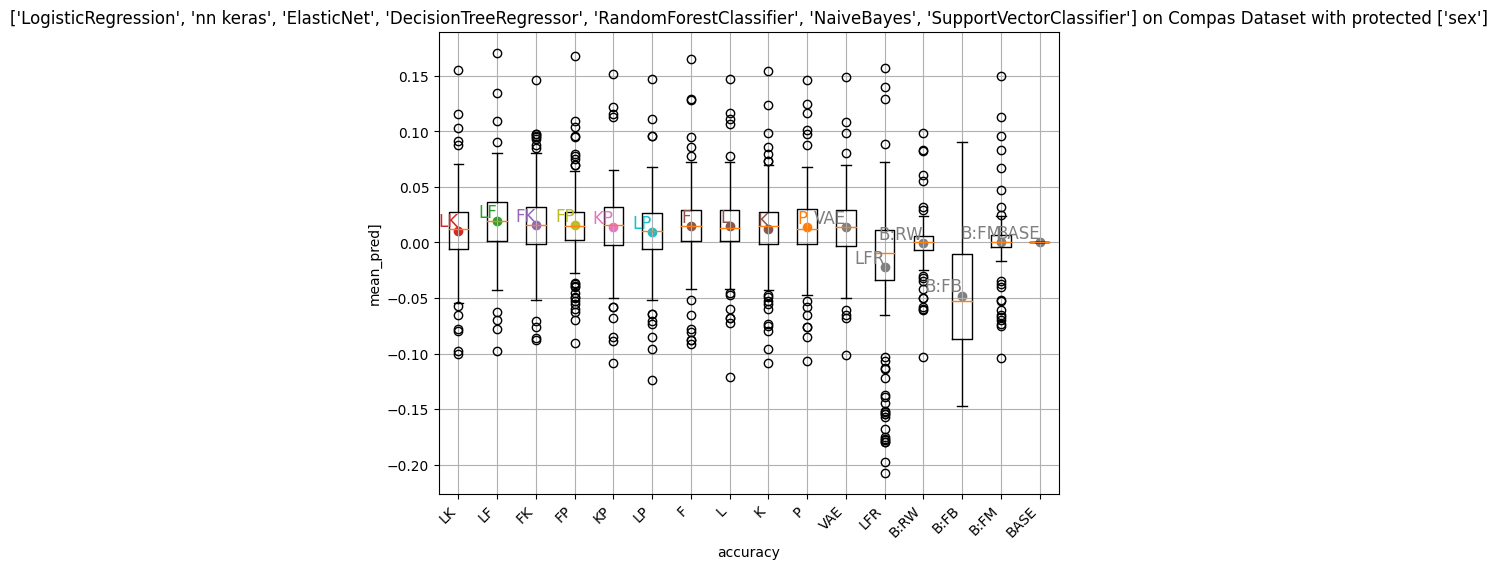

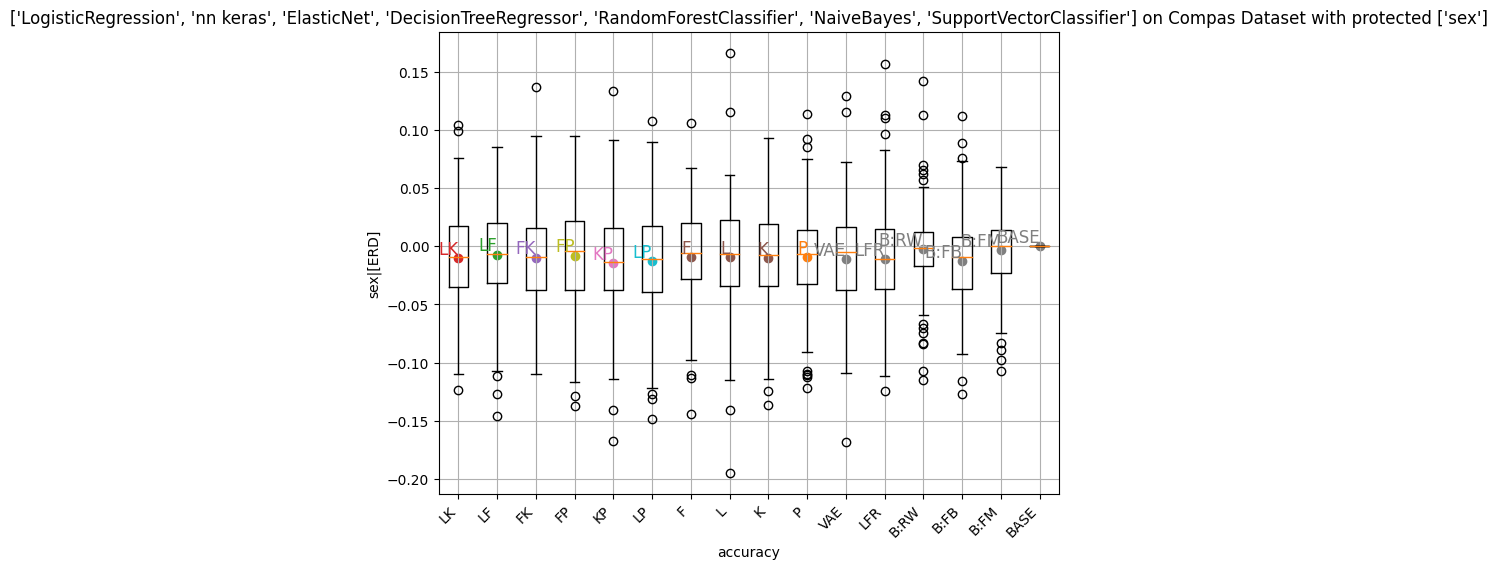

In [ ]:

def f(df):
    loss_a =  (df["other"].str.contains("Latent sens ADV loss"))  # (df["other"].str.contains("Sensitive KL loss")) 
    loss = loss_a | (df["other"].str.contains("Sensitive KL loss")) 
    general_mask = (df["data"].str.contains('German')) & (df["ML method"].str.contains('MLP'))
    performance_mask =  loss & (df["accuracy"]> -0.01 ) &(df["[SF] Statistical Parity Subgroup Fairness"]< -0.013 ) 
    #return df#[general_mask & ( performance_mask  | ~(df["other"].str.contains('FYP')) )]
    return df#[~(df["other"].str.contains('LFR'))]

reader.relative_metrics_filter = f

grapher = ResultsGrapher(reader)
grapher.show_legend = False
#grapher.plot_metrics_vs_metric(mean=False, relative=False, metrics = metrics_to_display, metric = Metrics.MEAN_Y)
grapher.plot_metrics_vs_metric(mean=False, relative=True, metrics = metrics_to_display, style=grapher.STYLE_IQR)
#grapher.plot_metrics_vs_metric(mean=False, relative=True, metrics = metrics_to_display, mean_var_same_label=True)